# Introdução ao Problema

## Contexto do Problema

A depressão é uma condição de saúde mental que afeta milhões de pessoas em todo o mundo, com impacto significativo entre os estudantes. O ambiente acadêmico muitas vezes apresenta fatores como **pressão acadêmica**, **satisfação nos estudos**, **hábitos de sono irregulares** e **estresse financeiro**, que podem aumentar a vulnerabilidade dos estudantes à depressão. 

A identificação precoce desses fatores é crucial, pois pode contribuir para a implementação de **intervenções preventivas** e para o suporte adequado aos indivíduos em risco.

Com o avanço das técnicas de **análise de dados** e do **aprendizado de máquina**, é possível desenvolver modelos preditivos que identificam, de forma eficiente e objetiva, estudantes propensos a desenvolverem depressão. Essa abordagem baseada em dados pode fornecer insights valiosos para educadores, psicólogos e instituições acadêmicas.

## Objetivo

O objetivo deste projeto é desenvolver um **modelo preditivo** capaz de prever a probabilidade de um estudante estar propenso à depressão. Utilizando variáveis como:

- Pressão acadêmica e no trabalho
- Satisfação nos estudos
- Hábitos de sono e dieta
- Histórico familiar de doença mental
- Estresse financeiro e horas de estudo/trabalho

O modelo utilizará técnicas de aprendizado de máquina aplicadas à base de dados fornecida, visando identificar fatores-chave e possibilitar intervenções direcionadas que promovam a **saúde  estudantil)mbiente estudantil.
inário)  |



# Entendimento do Problema

## Descrição das Variáveis

| **Variável**                                 | **Tipo**         | **Descrição**                                                                 |
|---------------------------------------------|------------------|------------------------------------------------------------------------------|
| `id`                                        | Numérica         | Identificador único para cada participante.                                  |
| `Gender`                                    | Categórica       | Gênero do participante (Masculino/Feminino).                                 |
| `Age`                                       | Numérica         | Idade do participante em anos.                                               |
| `City`                                      | Categórica       | Cidade onde o participante reside.                                           |
| `Profession`                                | Categórica       | Profissão do participante (por exemplo, Estudante).                          |
| `Academic Pressure`                         | Numérica         | Nível de pressão acadêmica percebida (Escala de 1 a 5).                      |
| `Work Pressure`                             | Numérica         | Nível de pressão no trabalho (Escala de 1 a 5).                              |
| `CGPA`                                      | Numérica         | Coeficiente de rendimento acadêmico do participante (nota média).            |
| `Study Satisfaction`                        | Numérica         | Nível de satisfação com os estudos (Escala de 1 a 5).                        |
| `Job Satisfaction`                          | Numérica         | Nível de satisfação com o trabalho (Escala de 1 a 5).                        |
| `Sleep Duration`                            | Categórica       | Duração média do sono do participante (ex.: "5-6 hours", "Less than 5 hours").|
| `Dietary Habits`                            | Categórica       | Hábitos alimentares (Saudáveis, Moderados, Não Saudáveis).                   |
| `Degree`                                    | Categórica       | Grau acadêmico atual (ex.: BSc, M.Tech, etc.).                               |
| `Have you ever had suicidal thoughts ?`     | Categórica       | Resposta se o participante já teve pensamentos suicidas (Sim/Não).           |
| `Work/Study Hours`                          | Numérica         | Número médio de horas diárias dedicadas ao estudo ou trabalho.               |
| `Financial Stress`                          | Numérica         | Nível de estresse financeiro (Escala de 1 a 5).                              |
| `Family History of Mental Illness`          | Categórica       | Histórico familiar de doença mental (Sim/Não).                               |
| `Depression`                                | Binária          | Diagnóstico de depressão (1 para sim, 0 para não).                           |

## Observação:
A variável **`Depression`** será utilizada como **variável-alvo** no projeto, ou seja, o modelo será treinado para prever essa variável com base nos outros fatores fornecidos.


#  Importação de Bibliotecas e Carregamento dos Dados

In [54]:
# Importação das bibliotecas essenciais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
data = pd.read_csv("Student_Depression_Dataset.csv")
data.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [3]:
# Verificar valores ausentes
valores_ausentes = data.isnull().sum()
proporcao_ausentes = (valores_ausentes / len(data)) * 100
proporcao_ausentes

id                                       0.000000
Gender                                   0.000000
Age                                      0.000000
City                                     0.000000
Profession                               0.000000
Academic Pressure                        0.000000
Work Pressure                            0.000000
CGPA                                     0.000000
Study Satisfaction                       0.000000
Job Satisfaction                         0.000000
Sleep Duration                           0.000000
Dietary Habits                           0.000000
Degree                                   0.000000
Have you ever had suicidal thoughts ?    0.000000
Work/Study Hours                         0.000000
Financial Stress                         0.010752
Family History of Mental Illness         0.000000
Depression                               0.000000
dtype: float64

In [4]:
# Verificar os tipos de dados
tipos_dados = data.dtypes
tipos_dados

id                                         int64
Gender                                    object
Age                                      float64
City                                      object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness          object
Depression                                 int64
dtype: object

In [5]:
# Resumo estatístico das variáveis numéricas para identificar possíveis outliers
resumo_numerico = data.describe()
resumo_numerico

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139867,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437347,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


In [6]:
# Criar um resumo consolidado
resumo_ausentes = pd.DataFrame({
    "Valores Ausentes": valores_ausentes,
    "Proporção (%)": proporcao_ausentes,
    "Tipo de Dados": tipos_dados
})
resumo_ausentes

,Valores Ausentes,Proporção (%),Tipo de Dados
id,0,0.000000,int64
Gender,0,0.000000,object
Age,0,0.000000,float64
City,0,0.000000,object
Profession,0,0.000000,object
Academic Pressure,0,0.000000,float64
Work Pressure,0,0.000000,float64
CGPA,0,0.000000,float64
Study Satisfaction,0,0.000000,float64
Job Satisfaction,0,0.000000,float64


In [7]:
# Remover linhas com valores ausentes
dados_limpos = data.dropna()

# Verificar se ainda há valores ausentes
valores_ausentes_apos_limpeza = dados_limpos.isnull().sum().sum()

valores_ausentes_apos_limpeza

0

In [8]:
# Criar cópias para preservar o dataset original e preparar para codificação
dados_codificados = dados_limpos.copy()

# Identificar variáveis categóricas e aplicar LabelEncoder
variaveis_categoricas = dados_codificados.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

# Aplicar a codificação
for coluna in variaveis_categoricas:
    dados_codificados[coluna] = label_encoder.fit_transform(dados_codificados[coluna])

# Verificar o resultado
dados_codificados.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,1,33.0,51,11,5.0,0.0,8.97,2.0,0.0,0,0,3,1,3.0,1.0,0,1
1,8,0,24.0,3,11,2.0,0.0,5.90,5.0,0.0,0,1,10,0,3.0,2.0,1,0
2,26,1,31.0,44,11,3.0,0.0,7.03,5.0,0.0,2,0,5,0,9.0,1.0,1,0
3,30,0,28.0,49,11,3.0,0.0,5.59,2.0,0.0,1,1,7,1,4.0,5.0,1,1
4,32,0,25.0,16,11,4.0,0.0,8.13,3.0,0.0,0,1,17,1,1.0,1.0,0,0


Todas as variáveis categóricas foram transformadas em valores numéricos utilizando ```LabelEncoder```. Agora, a base de dados está formatada para ser utilizada em modelos de machine learning.

- A codificação converteu cada categoria em números inteiros. Por exemplo, "Masculino" e "Feminino" na coluna de gênero foram substituídos por 1 e 0, respectivamente.
- As demais colunas categóricas, como estado civil e cursos, também foram convertidas para valores numéricos.

In [9]:
# Identificar colunas numéricas (excluindo categoricamente codificadas)
colunas_numericas = dados_codificados.select_dtypes(include=['float64', 'int64']).columns

In [10]:
# Aplicar Min-Max Scaling
scaler = MinMaxScaler()
dados_normalizados = dados_codificados.copy()
dados_normalizados[colunas_numericas] = scaler.fit_transform(dados_codificados[colunas_numericas])

In [11]:
# Verificar resultado da normalização
dados_normalizados.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0.000000,1,0.365854,51,11,1.0,0.0,0.897,0.4,0.0,0,0,3,1,0.250000,0.00,0,1.0
1,0.000043,0,0.146341,3,11,0.4,0.0,0.590,1.0,0.0,0,1,10,0,0.250000,0.25,1,0.0
2,0.000171,1,0.317073,44,11,0.6,0.0,0.703,1.0,0.0,2,0,5,0,0.750000,0.00,1,0.0
3,0.000199,0,0.243902,49,11,0.6,0.0,0.559,0.4,0.0,1,1,7,1,0.333333,1.00,1,1.0
4,0.000213,0,0.170732,16,11,0.8,0.0,0.813,0.6,0.0,0,1,17,1,0.083333,0.00,0,0.0


Os dados numéricos foram normalizados com sucesso para o intervalo entre 0 e 1 utilizando o método Min-Max Scaling. Agora, todas as variáveis numéricas estão na mesma escala, tornando os dados mais adequados para a aplicação de modelos de machine learning.

Insights:
- A normalização evita problemas relacionados a escalas diferentes entre as variáveis, o que é crucial para modelos que utilizam métricas de distância.
- As colunas categóricas, que já foram codificadas, permanecem inalteradas na escala numérica.

# Análise Exploratória dos Dados (EDA)

## Entenda o formato dos dados

Nesta etapa, realizamos uma análise exploratória inicial para entender o formato dos dados. O objetivo é verificar:

- Formato geral do conjunto de dados: dimensões, número de colunas e tipos de variáveis.
- Estatísticas descritivas: características das variáveis numéricas, como média, desvio padrão, mínimos e máximos.
- Valores ausentes: identificação de lacunas ou valores faltantes que precisaremos tratar em etapas futuras.

In [12]:
# Verificando informações gerais sobre os dados
informacoes_dados = data.info()
informacoes_dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [13]:
# Verificando estatísticas descritivas para variáveis numéricas
estatisticas_descritivas = data.describe()
estatisticas_descritivas

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139867,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437347,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


In [14]:
# Verificando a presença de valores ausentes
valores_ausentes = data.isnull().sum()
valores_ausentes

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

A proporção relativamente alta de indivíduos com **depressão** (58,5%) sugere que o problema é significativo entre os estudantes, destacando a importância de análises posteriores para identificar fatores-chave associados. Além disso, os poucos valores ausentes indicam que o dataset está bem estruturado, facilitando a limpeza e pré-processamento.

## Estatísticas básicas e visualizações: Distribuição da variável-alvo (Depression)

Nesta etapa, exploramos a distribuição da variável-alvo "Depression", que representa se um estudante foi identificado com depressão (1) ou não (0). Utilizamos estatísticas básicas e uma visualização gráfica para compreender a proporção de estudantes com e sem depressão.

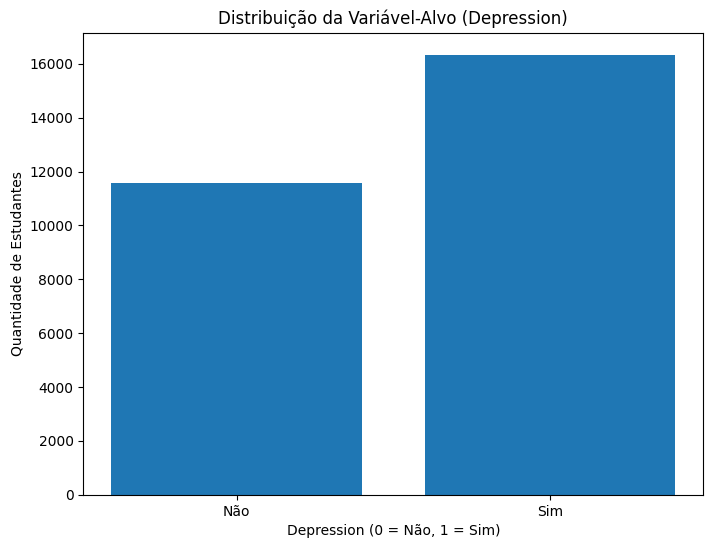

In [15]:
# Contagem de valores únicos na variável-alvo (Depression)
contagem_depressao = data['Depression'].value_counts()

# Gerando um gráfico de barras para a variável-alvo
plt.figure(figsize=(8, 6))
plt.bar(contagem_depressao.index, contagem_depressao.values)
plt.title('Distribuição da Variável-Alvo (Depression)')
plt.xlabel('Depression (0 = Não, 1 = Sim)')
plt.ylabel('Quantidade de Estudantes')
plt.xticks([0, 1], ['Não', 'Sim'])
plt.show()

In [16]:
# Calculando a proporção dos valores na variável-alvo
proporcao_depressao = contagem_depressao / len(data)
proporcao_depressao

Depression
1    0.585499
0    0.414501
Name: count, dtype: float64

## Estatísticas básicas e visualizações: Análise de variáveis categóricas e contínuas

Nesta etapa da Análise Exploratória de Dados (EDA), iremos explorar as variáveis categóricas e contínuas presentes no conjunto de dados. Nosso objetivo é compreender:
- **Distribuição das variáveis categóricas**: Avaliar a frequência de cada categoria em variáveis como "Gênero", "Dietary Habits" e "Family History of Mental Illness".
- **Distribuição das variáveis contínuas**: Visualizar a dispersão e comportamento de variáveis numéricas como "Idade", "CGPA", "Pressão Acadêmica" e "Horas de Estudo/Trabalho".
- **Relação com a variável-alvo (Depression)**: Explorar como essas variáveis se comportam em relação à depressão.

In [17]:
# Listando variáveis categóricas e contínuas
variaveis_categoricas = ['Gender', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 
                         'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']
variaveis_continuas = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 
                       'Job Satisfaction', 'Work/Study Hours', 'Financial Stress']

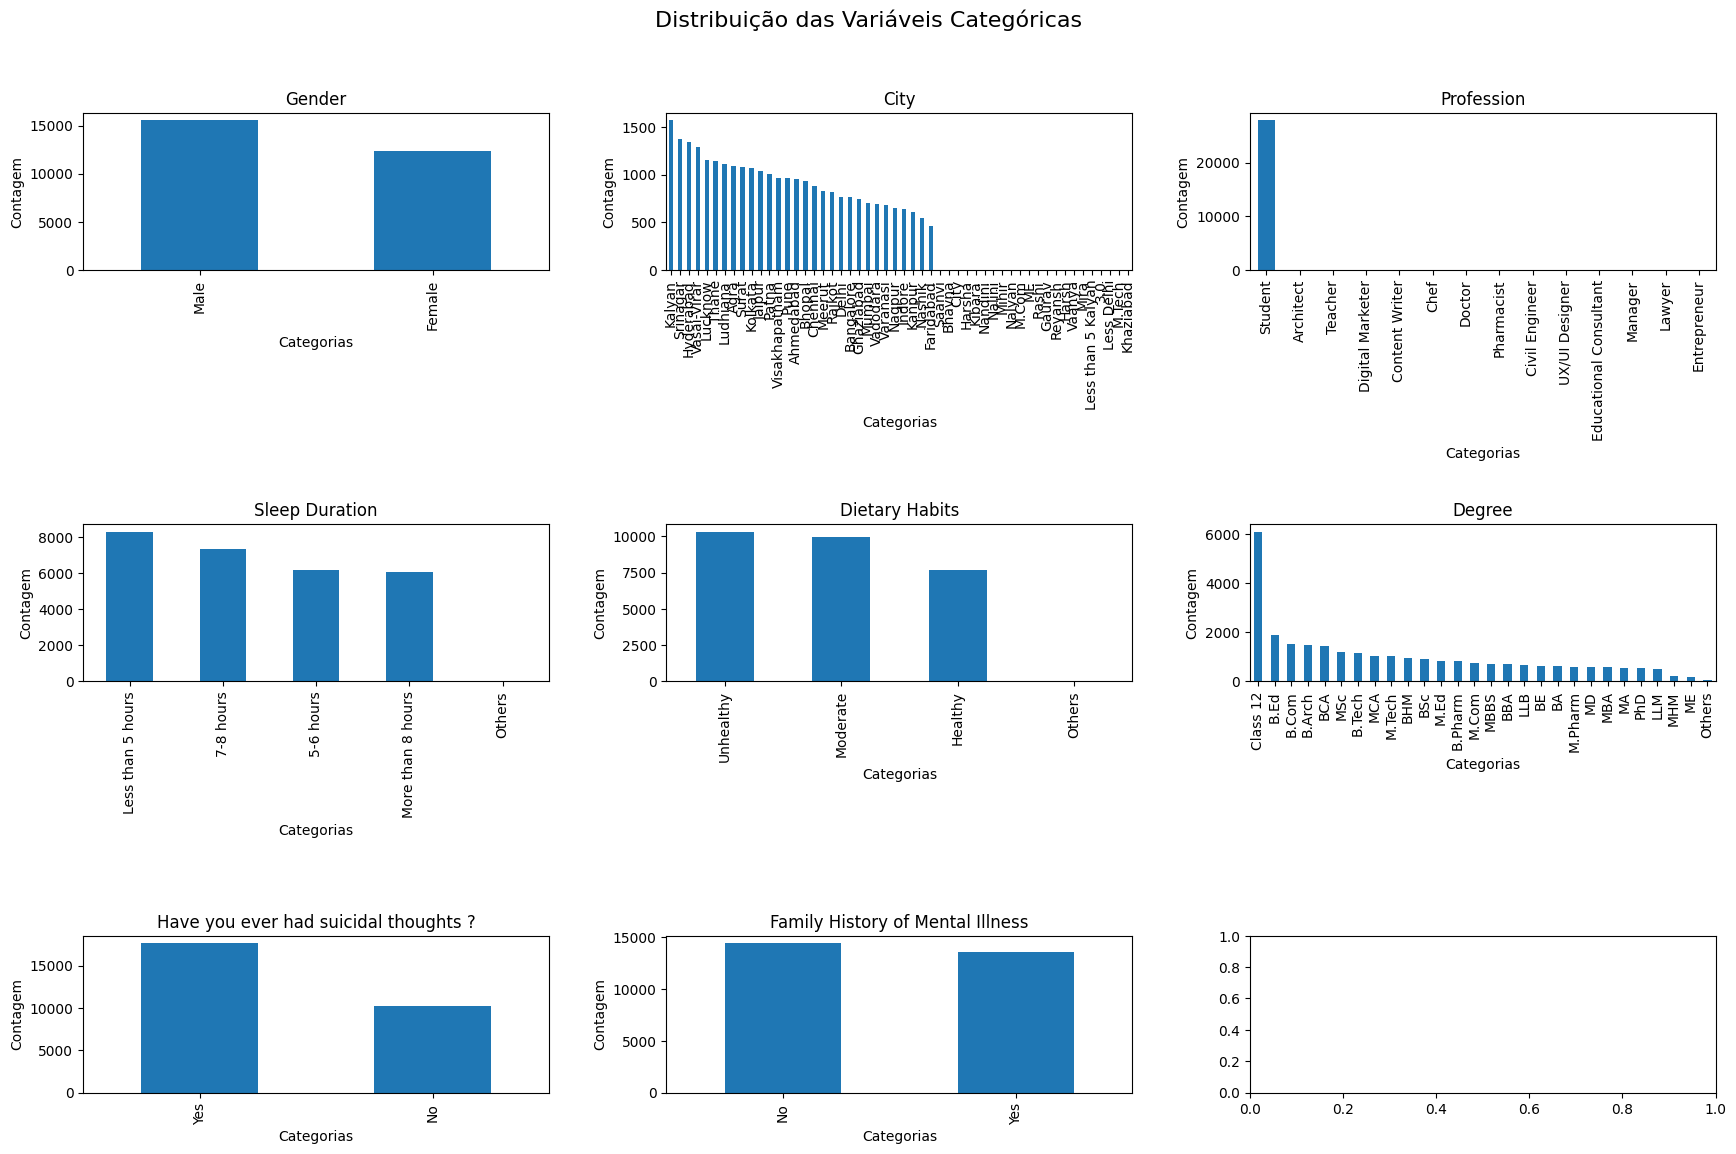

In [18]:
# Visualizando variáveis categóricas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
fig.suptitle('Distribuição das Variáveis Categóricas', fontsize=16)

for ax, coluna in zip(axes.flatten(), variaveis_categoricas):
    data[coluna].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(coluna)
    ax.set_ylabel('Contagem')
    ax.set_xlabel('Categorias')
    plt.tight_layout(pad=3)

plt.show()

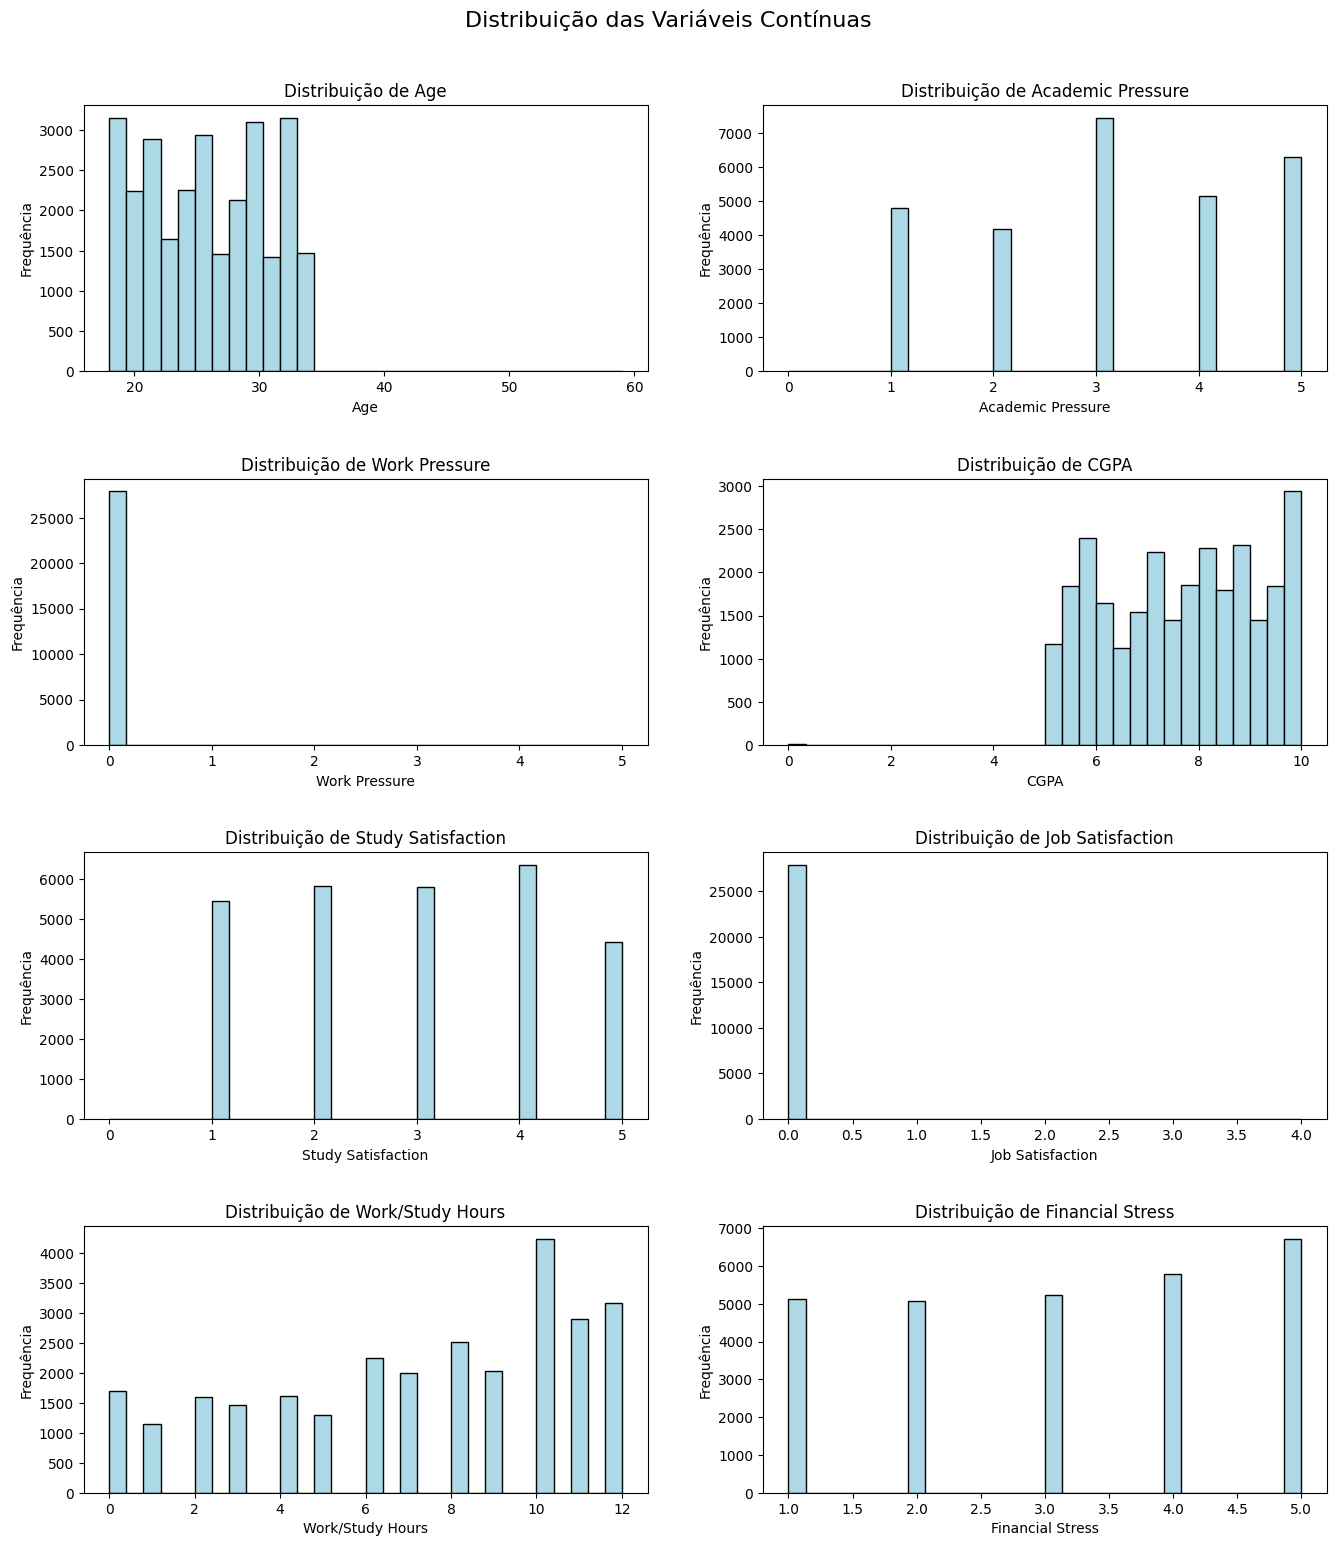

In [19]:
# Visualizando variáveis contínuas com histogramas
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 16))
fig.suptitle('Distribuição das Variáveis Contínuas', fontsize=16)

for ax, coluna in zip(axes.flatten(), variaveis_continuas):
    data[coluna].plot(kind='hist', bins=30, ax=ax, color='lightblue', edgecolor='black')
    ax.set_title(f'Distribuição de {coluna}')
    ax.set_xlabel(coluna)
    ax.set_ylabel('Frequência')
    plt.tight_layout(pad=3)

plt.show()

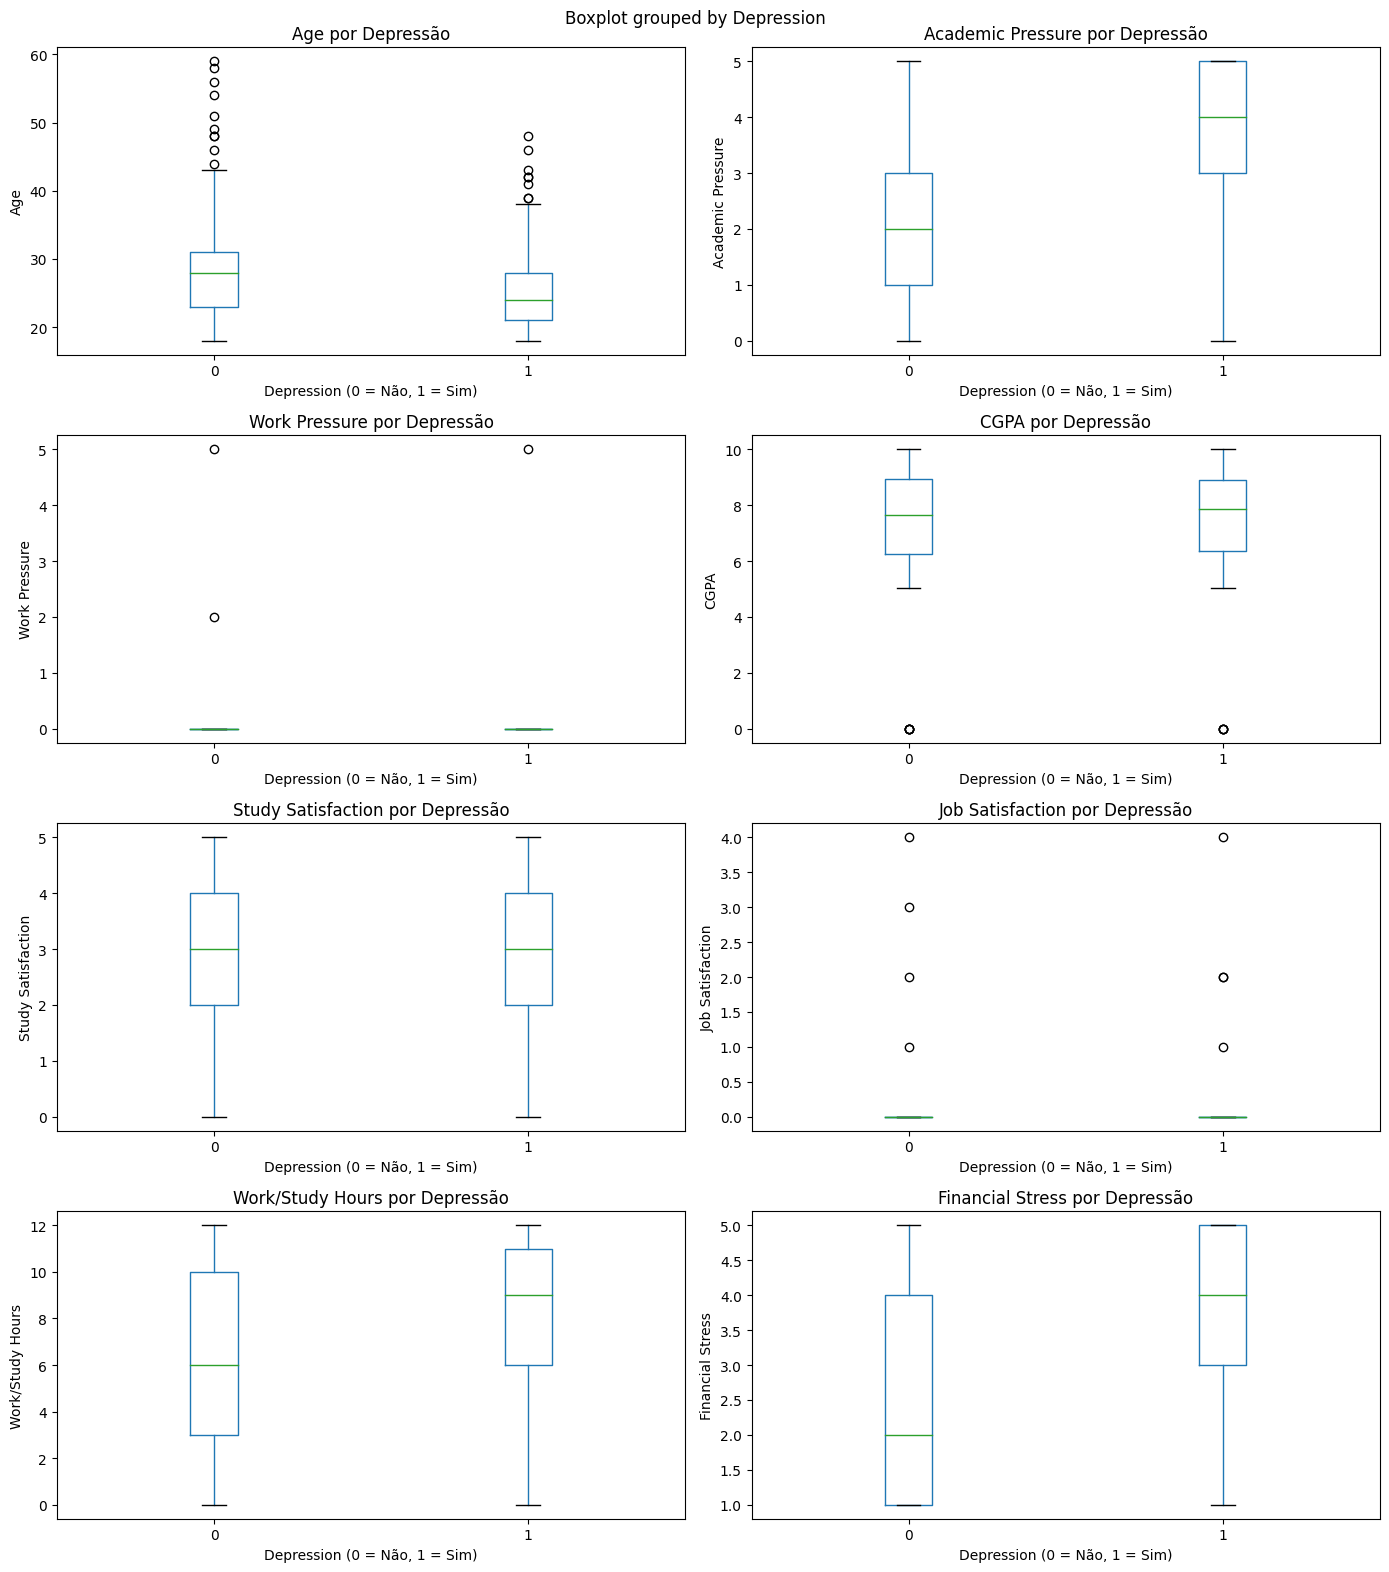

In [20]:
# Boxplots das variáveis contínuas em relação à variável-alvo "Depression"
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 16))
fig.suptitle('Boxplots das Variáveis Contínuas vs. Depressão', fontsize=16)

for ax, coluna in zip(axes.flatten(), variaveis_continuas):
    data.boxplot(column=coluna, by='Depression', ax=ax, grid=False)
    ax.set_title(f'{coluna} por Depressão')
    ax.set_xlabel('Depression (0 = Não, 1 = Sim)')
    ax.set_ylabel(coluna)

plt.tight_layout()
plt.show()

**Resultados Obtidos**

Variáveis Categóricas:
- **Gênero**: Existe um número maior de participantes do sexo masculino em comparação com o feminino.
- **Sleep Duration**: A maior parte dos estudantes dorme menos de 5-6 horas por dia, o que pode estar associado a uma saúde mental comprometida.
- **Dietary Habits**: Há um número significativo de estudantes com hábitos alimentares não saudáveis.
- **Family History of Mental Illness**: Aproximadamente metade dos estudantes relatou histórico familiar de doença mental.
- **Suicidal Thoughts**: A maioria dos estudantes relatou já ter tido pensamentos suicidas, o que é um sinal de alerta.

Variáveis Contínuas:
- **Idade**: A faixa predominante de idade está entre 20 e 30 anos, sendo comum em ambientes acadêmicos.
- **Academic Pressure**: A maioria dos estudantes reporta níveis moderados a altos de pressão acadêmica.
- **CGPA**: As notas acadêmicas variam amplamente, mas a mediana é próxima a 7-8.
- **Financial Stress**: O estresse financeiro é distribuído de forma concentrada nos valores mais altos (4-5).
- **Work/Study Hours**: Muitos estudantes reportam trabalhar ou estudar entre 8 a 12 horas por dia.

## Tratar valores ausentes (se aplicável)

Nesta etapa, trataremos os valores ausentes identificados no conjunto de dados. Durante a análise anterior, verificamos que:
- A variável "Financial Stress" apresenta 3 valores ausentes.

Como essa variável é numérica e possui poucos valores faltantes em comparação ao tamanho total do dataset (27.901 registros), utilizaremos a média como estratégia de imputação.

In [21]:
# Tratando os valores ausentes na variável "Financial Stress" com a média
media_financial_stress = data['Financial Stress'].mean()
data['Financial Stress'].fillna(media_financial_stress, inplace=True)

# Verificando novamente se há valores ausentes
valores_ausentes_pos_tratamento = data.isnull().sum()
valores_ausentes_pos_tratamento

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

## Codificação de variáveis categóricas: Transformar categorias em valores numéricos

Nesta etapa, iremos realizar a **codificação das variáveis categóricas**. Como os algoritmos de aprendizado de máquina geralmente operam com valores numéricos, precisamos converter variáveis categóricas em representações numéricas.

As técnicas que utilizaremos incluem:

- **Label Encoding**: Para variáveis categóricas com poucas categorias (ex.: "Gender", "Family History of Mental Illness").
- **One-Hot Encoding**: Para variáveis categóricas com várias categorias que não possuem hierarquia (ex.: "Sleep Duration", "Dietary Habits", "Degree").

In [22]:
# Aplicando Label Encoding para variáveis com poucas categorias
label_encoder_cols = ['Gender', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']
label_encoder = LabelEncoder()

for col in label_encoder_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Aplicando One-Hot Encoding para variáveis com múltiplas categorias
one_hot_cols = ['Sleep Duration', 'Dietary Habits', 'Degree', 'City', 'Profession']
data = pd.get_dummies(data, columns=one_hot_cols, drop_first=True)

# Verificando as primeiras linhas dos dados após codificação
data.head()

,id,Gender,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Have you ever had suicidal thoughts ?,Work/Study Hours,...,Profession_Digital Marketer,Profession_Doctor,Profession_Educational Consultant,Profession_Entrepreneur,Profession_Lawyer,Profession_Manager,Profession_Pharmacist,Profession_Student,Profession_Teacher,Profession_UX/UI Designer
0,2,1,33.0,5.0,0.0,8.97,2.0,0.0,1,3.0,...,False,False,False,False,False,False,False,True,False,False
1,8,0,24.0,2.0,0.0,5.90,5.0,0.0,0,3.0,...,False,False,False,False,False,False,False,True,False,False
2,26,1,31.0,3.0,0.0,7.03,5.0,0.0,0,9.0,...,False,False,False,False,False,False,False,True,False,False
3,30,0,28.0,3.0,0.0,5.59,2.0,0.0,1,4.0,...,False,False,False,False,False,False,False,True,False,False
4,32,0,25.0,4.0,0.0,8.13,3.0,0.0,1,1.0,...,False,False,False,False,False,False,False,True,False,False


# Preparação dos Dados para o Modelo

## Separação de variáveis independentes (X) e dependente (y)

Nesta etapa, iremos preparar os dados para a modelagem ao separar as variáveis:
- **Variáveis Independentes (X)**: Todas as colunas que servem como preditores (fatores que explicam ou influenciam a variável-alvo).
- **Variável Dependente (y)**: A coluna "Depression", que representa se o estudante apresenta ou não sintomas de depressão (0 = Não, 1 = Sim).

In [23]:
# Separando as variáveis independentes (X) e dependente (y)
X = data.drop(columns=['Depression', 'id'])  # Removendo a variável-alvo e a coluna de ID
y = data['Depression']

# Verificando as dimensões das variáveis
dimensoes_X = X.shape
dimensoes_y = y.shape

dimensoes_X, dimensoes_y

((27901, 109), (27901,))

## Divisão em conjuntos de treino e teste

Nesta etapa, dividiremos os dados em conjunto de treino e conjunto de teste:
- **Conjunto de treino (70%)**: Utilizado para treinar o modelo de aprendizado de máquina.
- **Conjunto de teste (30%)**: Utilizado para avaliar o desempenho do modelo em dados que ele não viu durante o treinamento.

In [24]:
# Dividindo os dados em treino e teste (70% treino, 30% teste)
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Verificando as dimensões dos conjuntos
dimensoes_treino = X_treino.shape, y_treino.shape
dimensoes_teste = X_teste.shape, y_teste.shape

dimensoes_treino, dimensoes_teste

(((19530, 109), (19530,)), ((8371, 109), (8371,)))

## Padronização dos dados (se necessário)
Nesta etapa, realizaremos a padronização dos dados numéricos, se necessário. A padronização é uma técnica que transforma os valores das variáveis contínuas para terem média zero e desvio padrão igual a um.

Por que isso é importante?
- Modelos como Regressão Logística, SVM e KNN são sensíveis a escalas diferentes entre as variáveis.
- A padronização ajuda a melhorar o desempenho e a estabilidade dos modelos.

In [25]:
# Identificando variáveis numéricas contínuas
variaveis_numericas = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction',
                       'Job Satisfaction', 'Work/Study Hours', 'Financial Stress']

# Aplicando padronização (StandardScaler) apenas às variáveis contínuas
scaler = StandardScaler()
X_treino[variaveis_numericas] = scaler.fit_transform(X_treino[variaveis_numericas])
X_teste[variaveis_numericas] = scaler.transform(X_teste[variaveis_numericas])

# Verificando as primeiras linhas após a padronização
X_treino.head()

,Gender,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,...,Profession_Digital Marketer,Profession_Doctor,Profession_Educational Consultant,Profession_Entrepreneur,Profession_Lawyer,Profession_Manager,Profession_Pharmacist,Profession_Student,Profession_Teacher,Profession_UX/UI Designer
3897,0,0.033877,0.620700,-0.007156,0.257220,-1.426588,-0.013494,1,0.766131,-0.790985,...,False,False,False,False,False,False,False,True,False,False
4787,0,-0.374151,-0.104707,-0.007156,1.510608,-0.691753,-0.013494,0,0.226863,-0.790985,...,False,False,False,False,False,False,False,True,False,False
9239,1,0.441905,-0.104707,-0.007156,0.570567,0.777916,-0.013494,1,0.766131,1.300694,...,False,False,False,False,False,False,False,True,False,False
10312,0,0.237891,1.346107,-0.007156,-1.309514,-1.426588,-0.013494,1,1.305400,0.603468,...,False,False,False,False,False,False,False,True,False,False
7711,1,-0.782179,1.346107,-0.007156,0.877102,1.512751,-0.013494,0,1.305400,1.300694,...,False,False,False,False,False,False,False,True,False,False


In [26]:
X_teste.head()

,Gender,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,...,Profession_Digital Marketer,Profession_Doctor,Profession_Educational Consultant,Profession_Entrepreneur,Profession_Lawyer,Profession_Manager,Profession_Pharmacist,Profession_Student,Profession_Teacher,Profession_UX/UI Designer
21885,0,0.849933,1.346107,-0.007156,-0.635137,1.512751,-0.013494,1,0.496497,-0.790985,...,False,False,False,False,False,False,False,True,False,False
17141,0,1.665989,-0.104707,-0.007156,-1.629673,0.777916,-0.013494,1,1.305400,-0.790985,...,False,False,False,False,False,False,False,True,False,False
9897,1,0.441905,0.620700,-0.007156,-1.636485,-0.691753,-0.013494,0,-0.851674,-0.790985,...,False,False,False,False,False,False,False,True,False,False
22337,1,-1.190207,-0.104707,-0.007156,-0.880365,-1.426588,-0.013494,1,0.496497,1.300694,...,False,False,False,False,False,False,False,True,False,False
26449,0,-0.782179,0.620700,-0.007156,-1.193712,-1.426588,-0.013494,0,-0.042771,-1.488212,...,False,False,False,False,False,False,False,True,False,False


# Construção do Modelo de Machine Learning

## Escolha do modelo inicial: Random Forest

Nesta etapa, construiremos nosso primeiro modelo de aprendizado de máquina utilizando o algoritmo **Random Forest**. Este modelo é baseado em uma coleção de árvores de decisão que trabalham de forma colaborativa para melhorar a precisão e reduzir o overfitting.

**Por que Random Forest?**
- Ele é robusto a dados desbalanceados.
- É eficaz em capturar relações complexas entre variáveis.
- Possui boa performance sem a necessidade de muitos ajustes iniciais.

**Passos:**
- Treinar o modelo Random Forest com os dados de treino.
- Avaliar o modelo usando o conjunto de teste.
- Medir métricas de desempenho como acurácia, precisão, recall e F1-score.

In [27]:
# Inicializando o modelo Random Forest
random_forest = RandomForestClassifier(random_state=42, n_estimators=100)

# Treinando o modelo com os dados de treino
random_forest.fit(X_treino, y_treino)

RandomForestClassifier(random_state=42)

In [28]:
# Realizando previsões no conjunto de teste
y_pred = random_forest.predict(X_teste)

# Calculando métricas de desempenho
acuracia = accuracy_score(y_teste, y_pred)
precisao = precision_score(y_teste, y_pred)
recall = recall_score(y_teste, y_pred)
f1 = f1_score(y_teste, y_pred)
relatorio_classificacao = classification_report(y_teste, y_pred, target_names=["Não", "Sim"])


In [29]:
precisao

0.8507113623075424

In [30]:
recall

0.8906345643746174

In [31]:
f1

0.8702153110047847

## Avaliação inicial do modelo

Nesta etapa, realizaremos a avaliação inicial do modelo Random Forest treinado anteriormente. Utilizaremos as seguintes métricas para análise de desempenho:

- Matriz de Confusão: Mostra os acertos e erros do modelo em cada classe.
- Relatório de Classificação: Inclui métricas como precisão, recall e F1-score.
- Acurácia: Representa a porcentagem total de previsões corretas.

In [32]:
# Calculando a matriz de confusão
matriz_confusao = confusion_matrix(y_teste, y_pred)

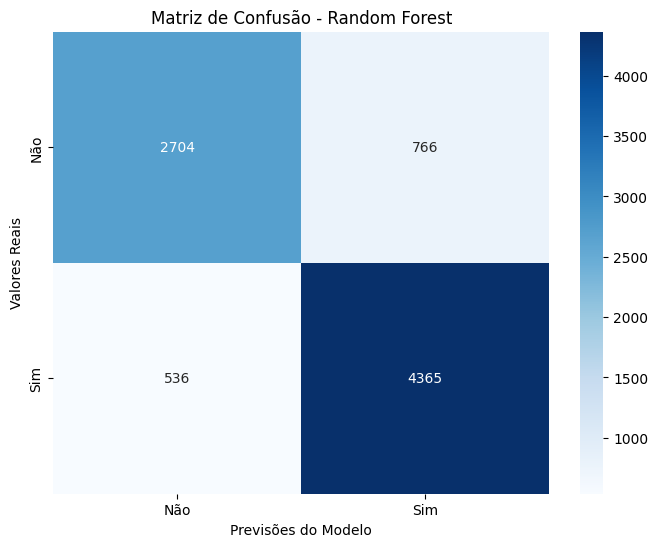

In [33]:
# Visualizando a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, fmt="d", cmap="Blues", xticklabels=["Não", "Sim"], yticklabels=["Não", "Sim"])
plt.title("Matriz de Confusão - Random Forest")
plt.xlabel("Previsões do Modelo")
plt.ylabel("Valores Reais")
plt.show()

In [34]:
print("\nRelatório de Classificação:")
print(relatorio_classificacao)

print("\nAcurácia:", acuracia)


Relatório de Classificação:
              precision    recall  f1-score   support

         Não       0.83      0.78      0.81      3470
         Sim       0.85      0.89      0.87      4901

    accuracy                           0.84      8371
   macro avg       0.84      0.83      0.84      8371
weighted avg       0.84      0.84      0.84      8371


Acurácia: 0.8444630271174293


- O modelo apresenta bom desempenho geral, com maior recall na classe "Sim" (89%), o que significa que ele consegue identificar corretamente a maioria dos estudantes com depressão.
- A classe "Não" tem um recall mais baixo (78%), indicando que o modelo ainda confunde alguns estudantes sem depressão como positivos.

## Análise de importância das variáveis

Nesta etapa, iremos realizar a análise de importância das variáveis com base no modelo Random Forest. O algoritmo fornece informações sobre quais variáveis tiveram maior impacto na decisão do modelo. Isso nos ajuda a:
- Identificar os fatores mais relevantes para prever depressão estudantil.
- Reduzir a dimensionalidade dos dados em etapas futuras, se necessário.

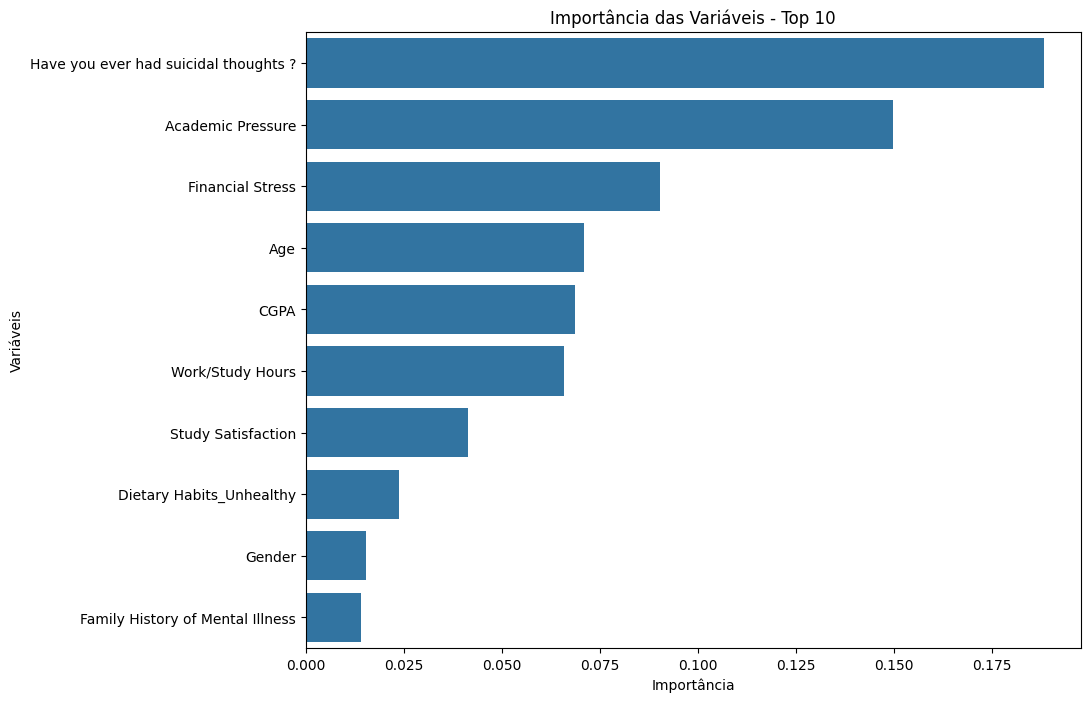

,Feature,Importance
7,Have you ever had suicidal thoughts ?,0.188239
2,Academic Pressure,0.149887
9,Financial Stress,0.090353
1,Age,0.070939
4,CGPA,0.068630
8,Work/Study Hours,0.065760
5,Study Satisfaction,0.041322
17,Dietary Habits_Unhealthy,0.023806
0,Gender,0.015371
10,Family History of Mental Illness,0.013999


In [35]:
# Analisando a importância das variáveis
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': random_forest.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plotando as 10 variáveis mais importantes
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10))
plt.title('Importância das Variáveis - Top 10')
plt.xlabel('Importância')
plt.ylabel('Variáveis')
plt.show()

# Exibindo as 10 principais variáveis
feature_importances.head(10)

A variável **"Have you ever had suicidal thoughts?"**" é de longe a mais influente, destacando a importância de fatores emocionais na identificação de depressão. Além disso, variáveis como **"pressão acadêmica, estresse financeiro e horas de trabalho/estudo**" são fatores-chave para a modelagem, confirmando os insights observados na análise exploratória.

# Otimização do Modelo

## Tuning de Hiperparâmetros com GridSearchCV

Nesta etapa, realizaremos a otimização do modelo Random Forest utilizando o GridSearchCV. O objetivo é ajustar os hiperparâmetros do modelo para encontrar a combinação que oferece o melhor desempenho.

**Por que isso é importante?**
- Random Forest possui hiperparâmetros que influenciam diretamente seu desempenho, como:
    - ```n_estimators```: Número de árvores na floresta.
    - ```max_depth```: Profundidade máxima das árvores.
    - ```min_samples_split```: Mínimo de amostras para dividir um nó.
    - ```min_samples_leaf```: Mínimo de amostras em um nó folha.
- A busca será realizada usando validação cruzada, o que garante que o modelo será avaliado de forma robusta.

In [36]:
# Definindo a grade de hiperparâmetros para otimização
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [37]:
# Inicializando o modelo Random Forest
random_forest = RandomForestClassifier(random_state=42)

# Configurando o GridSearchCV
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, 
                           cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

# Executando o GridSearchCV
grid_search.fit(X_treino, y_treino)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=2)

In [38]:
# Melhor modelo e hiperparâmetros# Melhor modelo e hiperparâmetros
melhores_parametros = grid_search.best_params_
melhor_modelo = grid_search.best_estimator_
melhores_parametros

melhores_parametros = grid_search.best_params_
melhor_modelo = grid_search.best_estimator_
melhores_parametros

{'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 200}

In [39]:
# Treinando o modelo com os melhores parâmetros encontrados
modelo_otimizado = RandomForestClassifier(
    n_estimators=200, 
    max_depth=None, 
    min_samples_split=5, 
    min_samples_leaf=2, 
    random_state=42
)

modelo_otimizado.fit(X_treino, y_treino)

RandomForestClassifier(min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, random_state=42)

In [40]:
# Realizando previsões no conjunto de teste
y_pred_otimizado = modelo_otimizado.predict(X_teste)

In [41]:
acuracia_otimizada = accuracy_score(y_teste, y_pred_otimizado)
precisao_otimizada = precision_score(y_teste, y_pred_otimizado)
recall_otimizado = recall_score(y_teste, y_pred_otimizado)
f1_otimizado = f1_score(y_teste, y_pred_otimizado)
relatorio_otimizado = classification_report(y_teste, y_pred_otimizado, target_names=["Não", "Sim"])
matriz_confusao_otimizada = confusion_matrix(y_teste, y_pred_otimizado)

In [42]:
acuracia_otimizada

0.8436268068331143

In [43]:
precisao_otimizada

0.8477924089852827

In [44]:
recall_otimizado

0.8932870842685167

In [45]:
f1_otimizado

0.8699453551912568

In [49]:
print("\nRelatório de Classificação:")
print(relatorio_otimizado)

print("\nAcurácia:", acuracia)


Relatório de Classificação:
              precision    recall  f1-score   support

         Não       0.84      0.77      0.80      3470
         Sim       0.85      0.89      0.87      4901

    accuracy                           0.84      8371
   macro avg       0.84      0.83      0.84      8371
weighted avg       0.84      0.84      0.84      8371


Acurácia: 0.8444630271174293


In [47]:
matriz_confusao_otimizada

array([[2684,  786],
       [ 523, 4378]], dtype=int64)

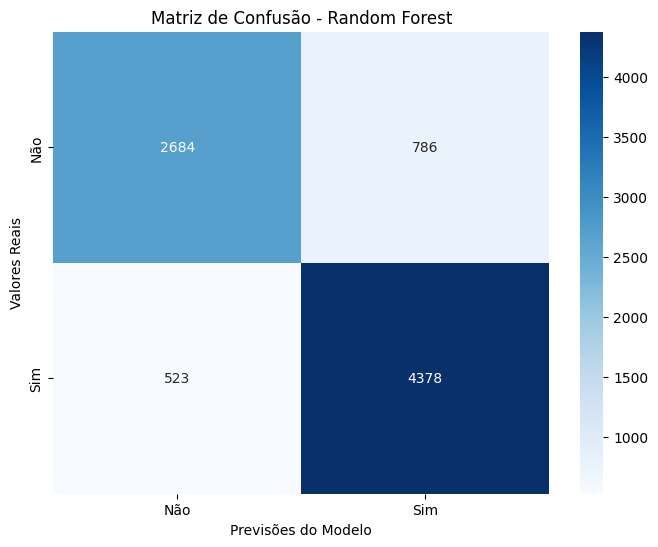

In [48]:
# Visualizando a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao_otimizada, annot=True, fmt="d", cmap="Blues", xticklabels=["Não", "Sim"], yticklabels=["Não", "Sim"])
plt.title("Matriz de Confusão - Random Forest")
plt.xlabel("Previsões do Modelo")
plt.ylabel("Valores Reais")
plt.show()

# Visualização dos Resultados

## Matriz de Confusão:

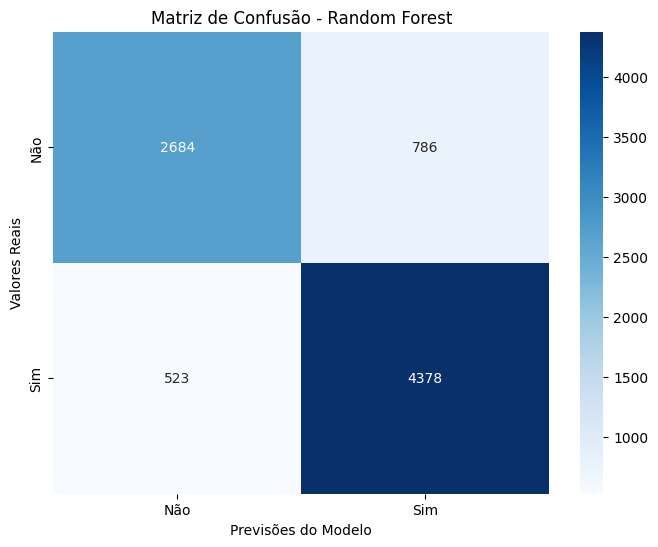

In [50]:
# Visualizando a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao_otimizada, annot=True, fmt="d", cmap="Blues", xticklabels=["Não", "Sim"], yticklabels=["Não", "Sim"])
plt.title("Matriz de Confusão - Random Forest")
plt.xlabel("Previsões do Modelo")
plt.ylabel("Valores Reais")
plt.show()

## Curva ROC e AUC:

A **Curva ROC** (Receiver Operating Characteristic) é uma ferramenta utilizada para avaliar o desempenho de modelos de classificação binária. Ela mostra a relação entre:

- **Taxa de Falsos Positivos (FPR)**: Proporção de negativos incorretamente classificados como positivos.
- **Taxa de Verdadeiros Positivos (TPR)**: Proporção de positivos corretamente classificados.

A **Área Sob a Curva (AUC)** mede a capacidade do modelo em distinguir entre as duas classes:
- **AUC próximo de 1**: Excelente desempenho na classificação.
- **AUC de 0,5**: Modelo com desempenho aleatório.

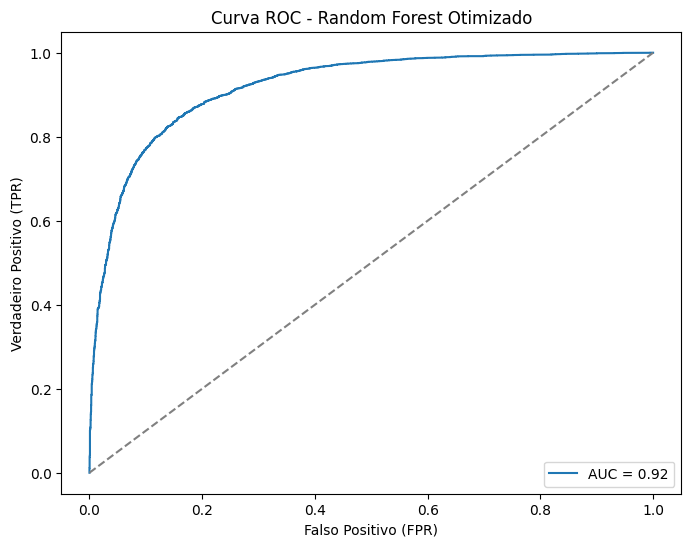

0.9199948019783059

In [53]:
# Calculando probabilidades para a curva ROC
y_probabilidades = modelo_otimizado.predict_proba(X_teste)[:, 1]

# Calculando a curva ROC
fpr, tpr, thresholds = roc_curve(y_teste, y_probabilidades)
auc = roc_auc_score(y_teste, y_probabilidades)

# Plotando a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Curva ROC - Random Forest Otimizado')
plt.xlabel('Falso Positivo (FPR)')
plt.ylabel('Verdadeiro Positivo (TPR)')
plt.legend(loc='lower right')
plt.show()

auc

A alta pontuação de **AUC = 0,92** indica que o modelo otimizado tem uma excelente capacidade de distinguir entre as classes "Sim" e "Não" para depressão. Isso significa que o modelo é robusto e eficaz na tarefa de classificação.

# Documentação e Conclusão

## Interpretação dos Resultados

**Variáveis Mais Importantes**:
- A análise de importância das variáveis revelou que os principais fatores associados à predição de depressão são:
    - **"Have you ever had suicidal thoughts?"**: A variável mais relevante, indicando a forte relação entre pensamentos suicidas e depressão.
    - **"Academic Pressure"**: A pressão acadêmica exerce um impacto significativo na saúde mental dos estudantes.
    - **"Financial Stress"**: O estresse financeiro é um fator de risco importante.
    - **"Age" e "CGPA"**: Idade e desempenho acadêmico também influenciam, embora em menor escala.
    - **"Work/Study Hours" e "Study Satisfaction"**: Muitas horas de estudo/trabalho e baixa satisfação com os estudos aumentam o risco de depressão.

Essas variáveis ajudam a identificar os principais fatores de risco que podem ser usados para desenvolver políticas e intervenções direcionadas à saúde mental dos estudantes.

**Desempenho do Modelo:**
- O modelo **Random Forest** apresentou resultados sólidos, tanto em sua versão inicial quanto após otimização:
    - **Acurácia: 84,4%** (capacidade geral do modelo de fazer previsões corretas).
    - **Recall: 89,3%** para a classe "Sim" (capacidade de identificar corretamente os casos reais de depressão).
    - **AUC: 0,92** (excelente capacidade de distinguir entre as classes "Sim" e "Não").

- Pontos Fortes:
    - Alta eficácia em identificar estudantes com depressão (recall elevado).
    - Bom equilíbrio entre **precisão** e **recall**, resultando em um F1-Score robusto.

## Estratégias baseadas no modelo para identificar estudantes em risco e propor suporte.
Com base nos principais fatores identificados pelo modelo, sugerimos as seguintes intervenções para identificar e apoiar estudantes em risco:

1. **Identificação Proativa**:
    - Utilizar o modelo para monitorar fatores críticos, como pensamentos suicidas, pressão acadêmica e estresse financeiro, enviando alertas precoces para equipes de apoio.

2. **Intervenções Acadêmicas**:
    - Promover gestão do tempo e flexibilização de prazos para reduzir a sobrecarga acadêmica.
    - Oferecer tutoria para estudantes com baixo desempenho (CGPA).

3. **Suporte Financeiro**:
    - Implementar auxílios financeiros e programas de educação financeira para reduzir o estresse econômico.

4. **Apoio Emocional**:
    - Disponibilizar serviços de aconselhamento psicológico e campanhas de conscientização sobre saúde mental.
  
5. **Promoção de Hábitos Saudáveis**:
    - Incentivar rotinas de sono e alimentação saudáveis.
    - Promover atividades físicas e extracurriculares para reduzir o estresse.
